# Projet BigData/BI

Réalisé par : ABDENNROUI Ilyes / LAURENT Emmanuel / LEGRAND Antoine / RONGIER Thomas

# 1. Introduction 

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm
from sklearn.preprocessing import OneHotEncoder
import scipy.stats as ss
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.pipeline import make_pipeline, make_union
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer, r2_score
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import xgboost as xgb
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
import statsmodels.api as sm
import pygwalker as pyg
import seaborn as sb
from lightgbm import LGBMRegressor
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
pd.set_option('display.max_columns', None)
import pickle
import os as os

Dans un contexte grandissant de la concurrence dans le secteur de l’immobilier dans la ville d'Ames dans Iowa, IOWA HOUSE, une agence immobilière implantée dans cette ville décide d’innover dans les services qu’elle propose afin de se démarquer de la concurrence.

Son idée, faciliter l’estimation des biens immobiliers afin de rendre plus rapide la vente des propriétés des clients. La mise en place de ce système permettra à IOWA HOUSE de se démarquer de la concurrence et donc d’attirer de nouveaux clients. 
C’est donc dans cette optique que IOWA HOUSE fait appel à notre équipe, afin de construire un outil permettant d’estimer les prix des biens immobiliers à l’aide de techniques de Machine Learning.


Pour nous permettre de réaliser notre projet, l'entreprise a mis à notre disposition un jeu de données contenant différentes informations sur 2919 logmements. Ces informations nous renseingent sur la surface du bien, l'état général, la date de construction... En tout et pour tout nous avons à disposition 81 variables.

Notre objectif, est de mettre en place un modèle de machine learning qui permet d'estimer le prix d'un bien en fonction des caractéristiques de ce dernier.

### Dictionnaire des données

Le dictionnaire des données nous permet d'avoir une description complète de nos données, nom du champ, le type de données, la description...

In [38]:
dico = pd.read_excel('./data/dictionnaire_de_données.xlsx')

### Importation des données

In [39]:
# Import du dataset train
df_train = pd.read_csv("./data/train.csv")

# Import du dataset test
df_test = pd.read_csv("./data/test.csv")

In [40]:
# Shape des dataframes (nombre d'observations et de colonnes)
print('train.shape  :', df_train.shape)
print('test.shape   :', df_test.shape)

train.shape  : (1460, 81)
test.shape   : (1459, 80)


In [41]:
# Apperçu de notre jeu de données d'entrainement la concatenation 
df_train.head(50)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [42]:
# Aperçu statistique des données numériques
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [43]:
# Aperçu des types de données de chaque colonne
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# 2. Etude de la variable cible

### Distribution

On commence par observer la distribution de la variable cible "SalePrice"

2023-03-19 18:28:11,186 [57092] WARNING  py.warnings:109: [JupyterRequire] C:\Users\Manu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



Text(0.5, 1.0, 'Distribution de la variable SalePrice')

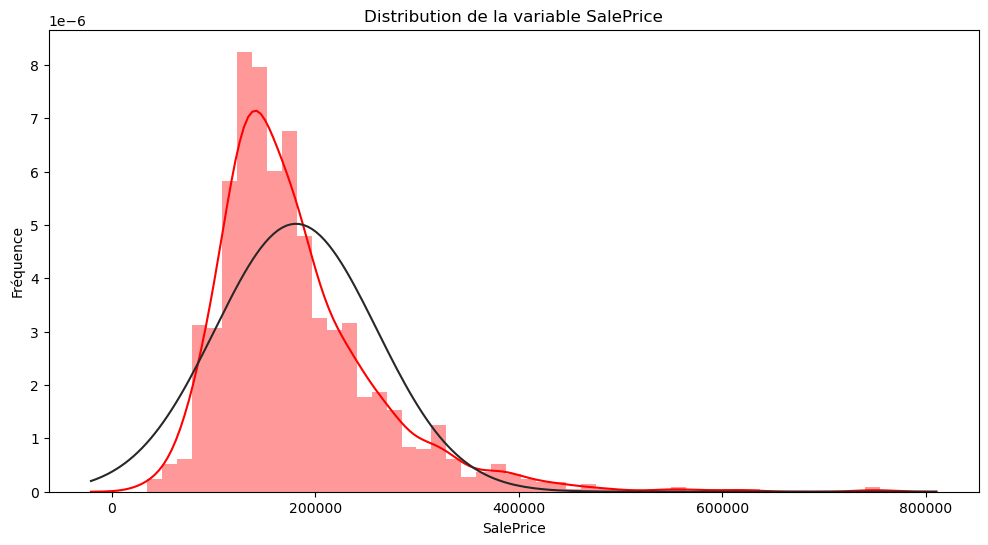

In [44]:
# Observation de la distribution de la variable Sale
plt.figure(figsize = (12,6))
sns.distplot(df_train['SalePrice'] , fit=norm, color="red");
plt.ylabel('Fréquence')
plt.title('Distribution de la variable SalePrice')

En regardant le graphique de distribution de la variable SalePrice, nous pouvons clairement constater que celle-ci ne semble pas être normale, mais asymétrique à droite.

Or, dans un exercice de régression on cherche à modéliser la relation entre une variable indépendante (X) et une variable dépendante (Y ou SalePrice dans notre cas). Dans la litérrature il est dit que les modèles de régression linéaire supposent souvent que les erreurs de la régression (ou les résidus) sont distribuées normalement, c'est-à-dire que les valeurs de Y (SalePrice) autour de la valeur prédite par le modèle suivent une distribution normale.

Si les erreurs ne suivent pas une distribution normale, cela peut affecter les estimations des paramètres du modèle et rendre les prévisions moins précises.

Afin d'obtenir cette distribution normal on peut essayé d'appliquer une transformation logarithmique

2023-03-19 18:28:11,494 [57092] WARNING  py.warnings:109: [JupyterRequire] C:\Users\Manu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



Text(0.5, 1.0, 'Distribution de la variable SalePrice avec transformation logarithmique')

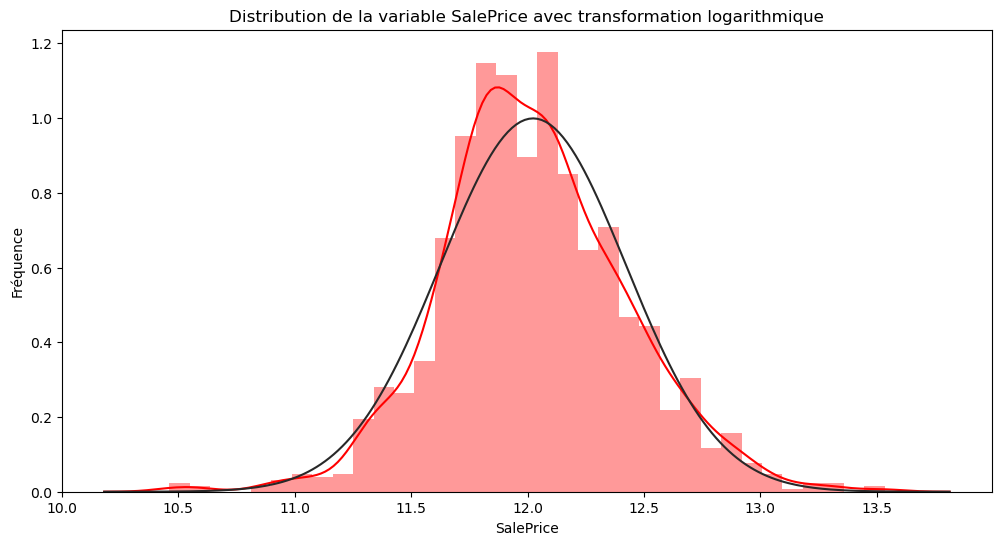

In [45]:
# application de la transformation logarithmique sur SalePrice
df_train["SalePrice"] = np.log1p(df_train["SalePrice"])

# Plot de la nouvelle distribution
plt.figure(figsize = (12,6))
sns.distplot(df_train['SalePrice'] , fit=norm, color="red",);
plt.ylabel('Fréquence')
plt.title('Distribution de la variable SalePrice avec transformation logarithmique')

## corrélation

Observer la corrélation des variables par rapport à la variable cible peut aider à identifier les variables les plus importantes pour prédire la variable cible. 

En effet, La corrélation entre chaque variable prédictive et la variable cible peut indiquer à quel point cette variable est importante pour prédire la variable cible. Une forte corrélation positive indique que la variable prédictive est positivement associée à la variable cible (dans notre cas une augmentation du prix de vente), tandis qu'une forte corrélation négative indique une association négative (dans notre cas une diminution du prix de vente).

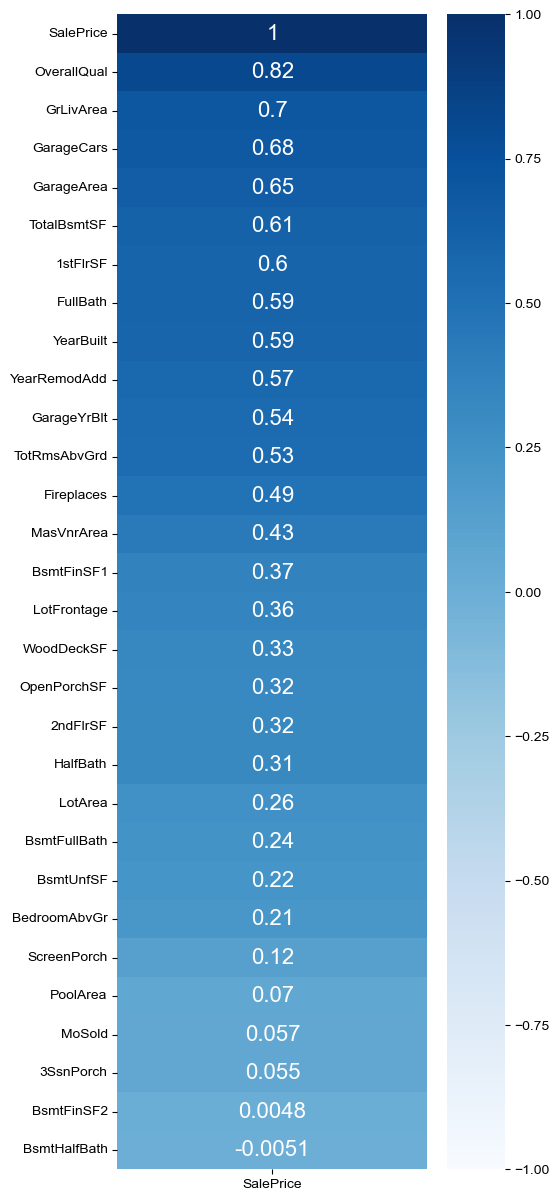

In [46]:
# Corrélation de la variable cible
corr=df_train.corr()
plt.figure(figsize=(5,15))
sb.heatmap(corr[['SalePrice']].sort_values(by=['SalePrice'],ascending=False).head(30),annot_kws={"size": 16},vmin=-1, cmap='Blues', annot=True)
sb.set(font_scale=2)

A l'aide de la figure ci-dessus, on peut "pronostiquer" que les variables numériques qui auront le plus d'impacte seront :
- OverallQual
- GrLivArea
- GarageCars
- GarageArea
- TotalBsmtSf
- 1stFlrSf
- FullBath
- yearBuilt
- YearRemodADD
- ...
    

# Features engineering

Maintenant que nous avons quelques informations sur les données, nous devons les prétraiter pour la partie modélisation.

Mais avant tout traitement il est important de préciser que si nous appliquons un traitement différent sur les données de train et de test, nous risquons d'introduire un biais dans les données, ce qui peut affecter les performances du modèle sur les données de test et mener à une mauvaise généralisation. 

En appliquant le même traitement sur le train et le test, nous nous assurons que le modèle est formé sur des données cohérentes et que les performances du modèle sur les données de test sont fiables.

Habituellement les données de test ne sont disponibles qu'à la fin, ici l'ensemble de test est déja disponible donc nous allons commencer par concatener les 2 dataframes.

In [47]:
# On sauvegazrde la shape des 2 dataframes afin de pouvoir les resséparer à l'avenir
shape_train = df_train.shape[0]
shape_test = df_test.shape[0]

# On met de coté notre variable cible
y_train = df_train.SalePrice.values

# Concaténation du test et train set
df_train_test = pd.concat((df_train, df_test)).reset_index(drop=True)

# Supression de la variable cible du datasets concaténé
df_train_test.drop(['SalePrice'], axis=1, inplace=True)
df_train_test.shape

(2919, 80)

On obtient un dataframe de 2919 observations

## Etude des valeurs manquantes 

On commence par traiter le problème des valeurs manquantes dans les différentes variable

In [48]:
# Looking at NaN % within the data

mqt = pd.DataFrame(df_train_test.isna().sum(), columns = ['mqt_sum'])
mqt['Variable'] = mqt.index
mqt['% manquant'] = (mqt['mqt_sum']/2919)*100
mqt = mqt[mqt['mqt_sum'] > 0]
mqt = mqt.sort_values(by = ['mqt_sum'])
mqt

,mqt_sum,Variable,% manquant
TotalBsmtSF,1,TotalBsmtSF,0.034258
GarageArea,1,GarageArea,0.034258
GarageCars,1,GarageCars,0.034258
KitchenQual,1,KitchenQual,0.034258
Electrical,1,Electrical,0.034258
BsmtUnfSF,1,BsmtUnfSF,0.034258
BsmtFinSF2,1,BsmtFinSF2,0.034258
BsmtFinSF1,1,BsmtFinSF1,0.034258
SaleType,1,SaleType,0.034258
Exterior1st,1,Exterior1st,0.034258


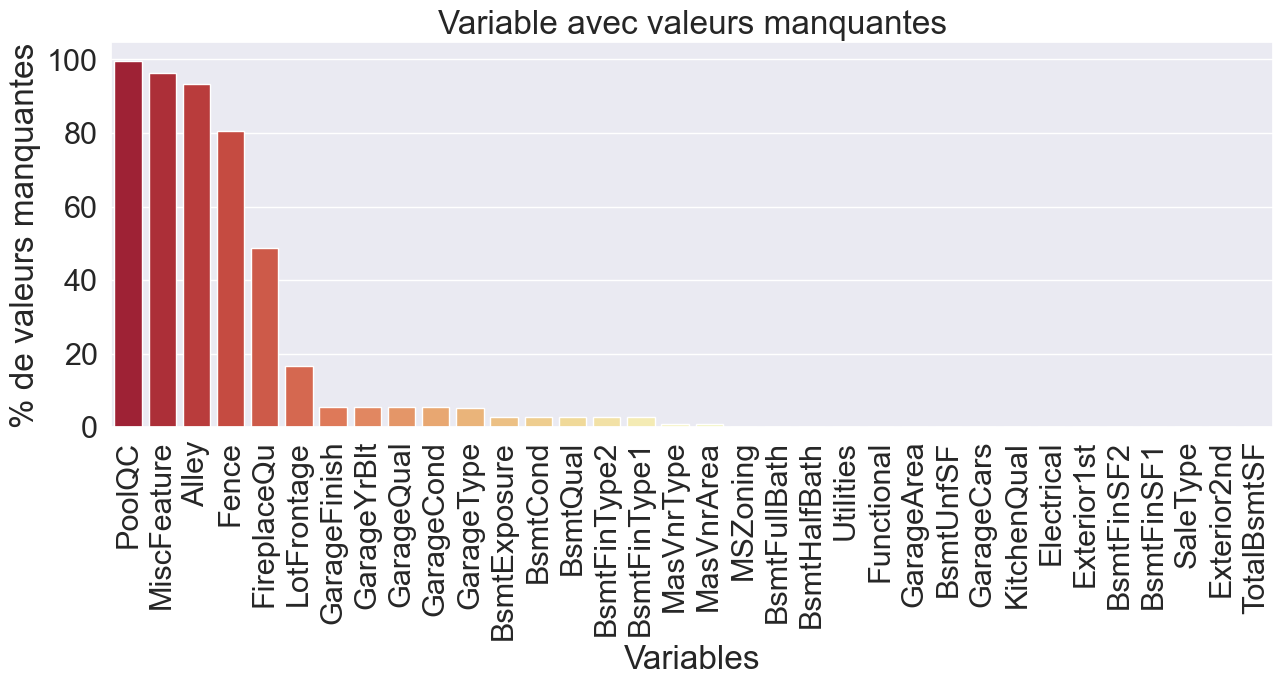

In [49]:
# On peut également plotter les valeurs manquantes

plt.figure(figsize = (15,5))
mqt = mqt.sort_values('% manquant', ascending=False)
sns.barplot(x = mqt['Variable'], y = mqt['% manquant'], palette ='RdYlGn')
plt.xticks(rotation=90)
plt.title('Variable avec valeurs manquantes')
plt.xlabel('Variables')
plt.ylabel('% de valeurs manquantes')
plt.show()

### Supression des valeurs manquantes

In [50]:
print('shape du dataframe df_train_test avant supression des variables:', df_train_test.shape)

# sélectionner les colonnes avec un pourcentage de valeurs manquantes supérieur à 15%

mqt_sum = df_train_test.isna().sum()
mqt_prct = mqt_sum/2919*100
mqt_prct

colomns_drop = list(mqt_prct[mqt_prct > 15].index)
print('les colonnes à supprimer sont:', colomns_drop)

# supprimer les colonnes sélectionnées
df_train_test = df_train_test.drop(columns=colomns_drop)

print('shape du dataframe df_train_test après supression des variables:', df_train_test.shape)

shape du dataframe df_train_test avant supression des variables: (2919, 80)
les colonnes à supprimer sont: ['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']
shape du dataframe df_train_test après supression des variables: (2919, 74)


Malgré la décision précédente de supprimer les variables ayant plus de 15% de valeurs manquantes, sommes-nous sûrs que tous ces nans sont de vraies valeurs manquantes ? 

En regardant le fichier de description donné, nous pouvons voir que la majorité de ces "Nan" ne sont pas réellement des valeurs manquantes. Nous pouvons alors les remplacer par les données indiqués dans le fichier.

### Remplacement des valeurs manquantes

In [51]:
# la description des données indique que NA fait référence à des valeurs typiques/moyenne ("Typ")
df_train_test['Functional'] = df_train_test['Functional'].fillna('Typ') 

# On peut remplacer les valeurs manquantes par ("Sbrkr") car la description des données indique 
# que cela correspond à un circuit électrique standart
df_train_test['Electrical'] = df_train_test['Electrical'].fillna("SBrkr")

# On peut remplacer les valeurs manquantes par ("TA") car la description des données indique 
# que cela correspond à des valeurs typiques/moyenne
df_train_test['KitchenQual'] = df_train_test['KitchenQual'].fillna("TA")

# On remplace les valeurs manquantes par 0 de ces variables car cela signifie que si il n'y a pas de garage 
# il n'y pas d'année de construction, ni de nombre de voiture, etc...
df_train_test['GarageYrBlt'] = df_train_test['GarageYrBlt'].fillna(0)
df_train_test['GarageArea'] = df_train_test['GarageArea'].fillna(0)
df_train_test['GarageCars'] = df_train_test['GarageCars'].fillna(0)
        
# On remplace par None car une valeur manquante signifie pas de garage dans la doc
df_train_test['GarageType'] = df_train_test['GarageType'].fillna('None')
df_train_test['GarageQual'] = df_train_test['GarageQual'].fillna('None')
df_train_test['GarageCond'] = df_train_test['GarageCond'].fillna('None')   
df_train_test['GarageFinish'] = df_train_test['GarageFinish'].fillna('None')  

# On remplace par None car une valeur manquante signifie pas de sous-sol dans la doc
df_train_test['BsmtQual'] = df_train_test['BsmtQual'].fillna('None')
df_train_test['BsmtCond'] = df_train_test['BsmtCond'].fillna('None')
df_train_test['BsmtExposure'] = df_train_test['BsmtExposure'].fillna('None')   
df_train_test['BsmtFinType1'] = df_train_test['BsmtFinType1'].fillna('None')
df_train_test['BsmtFinType2'] = df_train_test['BsmtFinType2'].fillna('None')

# Pour ces variables nous avons uniquement une valeur manquante on remplace alors par la valeur la plus fréquente de la variable
df_train_test['Exterior1st'] = df_train_test['Exterior1st'].fillna(df_train_test['Exterior1st'].mode()[0])
df_train_test['Exterior2nd'] = df_train_test['Exterior2nd'].fillna(df_train_test['Exterior2nd'].mode()[0])
df_train_test['SaleType'] = df_train_test['SaleType'].fillna(df_train_test['SaleType'].mode()[0])
df_train_test['MSZoning'] = df_train_test.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

# On remplace l'unique valeur manquante de Utilities par sa valeur la plus fréquente.
df_train_test.update(df_train_test['Utilities'].fillna('AllPub'))

# On peut remplacer les valeurs manquantes pour ces variables numériques car si l'on a pas de sous-sol la valeur est logique
df_train_test.update(df_train_test['BsmtFinSF1'].fillna(0))
df_train_test.update(df_train_test['BsmtFinSF2'].fillna(0))
df_train_test.update(df_train_test['BsmtUnfSF'].fillna(0))
df_train_test.update(df_train_test['TotalBsmtSF'].fillna(0))
df_train_test.update(df_train_test['BsmtFullBath'].fillna(0))
df_train_test.update(df_train_test['BsmtHalfBath'].fillna(0))

# Même chose avec zone de placage de maçonnerie
df_train_test.update(df_train_test['MasVnrArea'].fillna(0))
df_train_test.update(df_train_test['MasVnrType'].fillna('None'))

Nous n'avons plus de valeurs manquantes

### Création de variables

On peut également ajouter des variables à partir de l'existant afin de les simplifier/améliorer/réduire

In [52]:
print('shape du dataframe df_train_test avant ajout des variables:', df_train_test.shape)

# Création d'une variable surface total
df_train_test['Total_SF']=df_train_test['TotalBsmtSF'] + df_train_test['1stFlrSF'] + df_train_test['2ndFlrSF']

# Création d'une variable de la surface total du porche
df_train_test['Total_porch_sf'] = (df_train_test['OpenPorchSF'] + df_train_test['3SsnPorch'] +
                              df_train_test['EnclosedPorch'] + df_train_test['ScreenPorch'] + df_train_test['WoodDeckSF'])

# Création d'une variable nombre total de salle de bain
df_train_test['Total_Bathrooms'] = (df_train_test['FullBath'] + (0.5 * df_train_test['HalfBath']) 
                                    + df_train_test['BsmtFullBath'] + (0.5 * df_train_test['BsmtHalfBath']))

# On peut également réaliser une variable taille moyenne par pièce
df_train_test["SqFtPerRoom"] = df_train_test["GrLivArea"] / (df_train_test["TotRmsAbvGrd"] +
                                                       df_train_test["Total_Bathrooms"]) # On ajoute Total_Bathrooms car TotRmsAbvGrd n'inclue pas les salle de bain

print('shape du dataframe df_train_test après ajout des variables:', df_train_test.shape)

shape du dataframe df_train_test avant ajout des variables: (2919, 74)
shape du dataframe df_train_test après ajout des variables: (2919, 78)


Afin de pouvoir réaliser une régression il est important d'avoir uniquement des valeurs numériques dans le dataframes, pour cela on va dummiser nous variables catégorielles.

In [53]:
df_train_test_dummies = pd.get_dummies(df_train_test)

print('shape du dataframe df_train_test après dummisation:', df_train_test_dummies.shape)

shape du dataframe df_train_test après dummisation: (2919, 283)


# Modélisation

## Echantillonage

In [54]:
# reséparation du train set et du test set 
X_train = df_train_test_dummies[:df_train.shape[0]]
X_test = df_train_test_dummies[df_train.shape[0]:]

### Création des modèles en recherchant les meilleur paramètres et en réalisant des cross validation sur le train_set

#### RandomForestRegressor

In [21]:
# Définir la grille de paramètres
grid = { 
    'n_estimators': [1000, 2000, 3000],
    'random_state': [42],
    'n_jobs': [-1], # activer tout les coeurs du processeur
}

# Définir le modèle
model = RandomForestRegressor()

# Créer un dictionnaire de scorers pour la validation croisée
scorers = {
    'rmse': make_scorer(mean_squared_error, squared=False),
    'r2': make_scorer(r2_score)
}

# Créer l'objet GridSearchCV avec la grille de paramètres et les scorers
grid_search = GridSearchCV(model, grid, scoring=scorers, refit='rmse', cv=5)

# Effectuer la validation croisée sur les données
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres et les scores correspondants
print("Best parameters: ", grid_search.best_params_)
print("Best RMSE score: ", grid_search.best_score_)
print("Best R2 score: ", grid_search.cv_results_['mean_test_r2'][grid_search.best_index_])

Best parameters:  {'n_estimators': 2000, 'n_jobs': -1, 'random_state': 42}
Best RMSE score:  0.1421789796560966
Best R2 score:  0.8726061918322582


#### XGBRegressor

In [52]:
# Définir la grille de paramètres
grid = {
    'n_estimators': [2000, 3000, 4000],
    'subsample': [0.5], # Valeur conseillé dans la doc
    'nthread': [-1], # activer tout les coeurs du processeur
    'learning_rate' : [0.03,0.3], #Taux d'apprentissage pour l'algorithme de gradient boosting. Le diminuer limite le surapprentissage
    'max_depth' : [6,3]  #nombre de feuille par arbre
}

# Définir le modèle
model = XGBRegressor()

# Créer un dictionnaire de scorers pour la validation croisée
scorers = {
    'rmse': make_scorer(mean_squared_error, squared=False),
    'r2': make_scorer(r2_score)
}

# Créer l'objet GridSearchCV avec la grille de paramètres et les scorers
grid_search = GridSearchCV(model, grid, scoring=scorers, refit='rmse', cv=5)

# Effectuer la validation croisée sur les données
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres et les scores correspondants
print("Best parameters: ", grid_search.best_params_)
print("Best RMSE score: ", grid_search.best_score_)
print("Best R2 score: ", grid_search.cv_results_['mean_test_r2'][grid_search.best_index_])

Best parameters:  {'learning_rate': 0.03, 'max_depth': 6, 'n_estimators': 2000, 'nthread': -1, 'subsample': 0.5}
Best RMSE score:  0.12301483163525351
Best R2 score:  0.9048437671016153


#### lightgbm

In [43]:
from lightgbm import LGBMRegressor
# Définir la grille de paramètres
grid = { 
    'n_estimators': [2000, 3000, 4000],
    'num_leaves': [4, 6], # Le nombre de feuille par arbre est défini a 31 d'origine on réduit a 10 sinon beaucoup trop long
    'nthread': [-1] # activer tout les coeurs du processeur
}

# Définir le modèle
model = LGBMRegressor()

# Créer un dictionnaire de scorers pour la validation croisée
scorers = {
    'rmse': make_scorer(mean_squared_error, squared=False),
    'r2': make_scorer(r2_score)
}

# Créer l'objet GridSearchCV avec la grille de paramètres et les scorers
grid_search = GridSearchCV(model, grid, scoring=scorers, refit='rmse', cv=5)

# Effectuer la validation croisée sur les données
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres et les scores correspondants
print("Best parameters: ", grid_search.best_params_)
print("Best RMSE score: ", grid_search.best_score_)
print("Best R2 score: ", grid_search.cv_results_['mean_test_r2'][grid_search.best_index_])

[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Curr

#### GradientBoostingRegressor

In [24]:
# Définir la grille de paramètres
grid = {} # paramètre par défaut 

# Définir le modèle
model = GradientBoostingRegressor()

# Créer un dictionnaire de scorers pour la validation croisée
scorers = {
    'rmse': make_scorer(mean_squared_error, squared=False),
    'r2': make_scorer(r2_score)
}

# Créer l'objet GridSearchCV avec la grille de paramètres et les scorers
grid_search = GridSearchCV(model, grid, scoring=scorers, refit='rmse', cv=5)

# Effectuer la validation croisée sur les données
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres et les scores correspondants
print("Best parameters: ", grid_search.best_params_)
print("Best RMSE score: ", grid_search.best_score_)
print("Best R2 score: ", grid_search.cv_results_['mean_test_r2'][grid_search.best_index_])

Best parameters:  {}
Best RMSE score:  0.1237771617847937
Best R2 score:  0.9036181575311864


#### ElasticNet

In [25]:
# Définir la grille de paramètres
grid = {} # paramètre par défault

#Définir le modèle
model = ElasticNet()

# Créer un dictionnaire de scorers pour la validation croisée
scorers = {
    'rmse': make_scorer(mean_squared_error, squared=False),
    'r2': make_scorer(r2_score)
}

# Créer l'objet GridSearchCV avec la grille de paramètres et les scorers
grid_search = GridSearchCV(model, grid, scoring=scorers, refit='rmse', cv=5)

# Effectuer la validation croisée sur les données
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres et les scores correspondants
print("Best parameters: ", grid_search.best_params_)
print("Best RMSE score: ", grid_search.best_score_)
print("Best R2 score: ", grid_search.cv_results_['mean_test_r2'][grid_search.best_index_])

Best parameters:  {}
Best RMSE score:  0.18815048988342917
Best R2 score:  0.768205506633884


#### Lasso

In [26]:
# Définir la grille de paramètres
grid = {} # paramètre par défault

#Définir le modèle
model = Lasso()

# Créer un dictionnaire de scorers pour la validation croisée
scorers = {
    'rmse': make_scorer(mean_squared_error, squared=False),
    'r2': make_scorer(r2_score)
}

# Créer l'objet GridSearchCV avec la grille de paramètres et les scorers
grid_search = GridSearchCV(model, grid, scoring=scorers, refit='rmse', cv=5)

# Effectuer la validation croisée sur les données
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres et les scores correspondants
print("Best parameters: ", grid_search.best_params_)
print("Best RMSE score: ", grid_search.best_score_)
print("Best R2 score: ", grid_search.cv_results_['mean_test_r2'][grid_search.best_index_])

Best parameters:  {}
Best RMSE score:  0.1960651438532805
Best R2 score:  0.7487739650552725


#### KernelRidge

In [27]:
# Définir la grille de paramètres
grid = {} # paramètre par défault

#Définir le modèle
model = KernelRidge()

# Créer un dictionnaire de scorers pour la validation croisée
scorers = {
    'rmse': make_scorer(mean_squared_error, squared=False),
    'r2': make_scorer(r2_score)
}

# Créer l'objet GridSearchCV avec la grille de paramètres et les scorers
grid_search = GridSearchCV(model, grid, scoring=scorers, refit='rmse', cv=5)

# Effectuer la validation croisée sur les données
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres et les scores correspondants
print("Best parameters: ", grid_search.best_params_)
print("Best RMSE score: ", grid_search.best_score_)
print("Best R2 score: ", grid_search.cv_results_['mean_test_r2'][grid_search.best_index_])

Best parameters:  {}
Best RMSE score:  0.13497997241188658
Best R2 score:  0.8832733349319268


#### StackingCVRegressor

Le StackingCVRegressor est une technique d'ensemble qui permet de combiner les prédictions de plusieurs modèles de régression.

In [55]:
# Paramétrage des modèles à partir paramètres obtenu précedemment
LGBMR = LGBMRegressor(n_estimators = 4000, num_leaves = 4)
Xgboost = XGBRegressor(learning_rate = 0.03, max_depth = 6, n_estimators = 2000, subsample = 0.5)
RFR = RandomForestRegressor(n_estimators = 2000, random_state= 42)
GBR = GradientBoostingRegressor()

In [59]:
# Définir la grille de paramètres
grid = {} # paramètre par défault

# Créer un dictionnaire de scorers pour la validation croisée
scorers = {
    'rmse': make_scorer(mean_squared_error, squared=False),
    'r2': make_scorer(r2_score)
}

# Créer l'objet GridSearchCV avec la grille de paramètres et les scorers
model = StackingCVRegressor(regressors=(LGBMR, Xgboost, RFR, GBR), meta_regressor=Xgboost, n_jobs=-1)

# Créer l'objet GridSearchCV avec la grille de paramètres et les scorers
grid_search = GridSearchCV(model, grid, scoring=scorers, refit='rmse', cv=5)

# Effectuer la validation croisée sur les données
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres et les scores correspondants
print("Best parameters: ", grid_search.best_params_)
print("Best RMSE score: ", grid_search.best_score_)
print("Best R2 score: ", grid_search.cv_results_['mean_test_r2'][grid_search.best_index_])

2023-03-19 18:30:05,937 [57092] WARNING  py.warnings:109: [JupyterRequire] C:\Users\Manu\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(

2023-03-19 18:30:06,081 [57092] WARNING  py.warnings:109: [JupyterRequire] C:\Users\Manu\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(

2023-03-19 18:31:04,085 [57092] WARNING  py.warnings:109: [JupyterRequire] C:\Users\Manu\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(

2023-03-19 18:31:04,225 [57092] WARNING  py.warnings:109: [JupyterRequire] C:\Users\Manu\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.war

Best parameters:  {}
Best RMSE score:  0.13706852848182502
Best R2 score:  0.8818311559748878


Le meilleur modèle obtenu est le XGBRegressor

### Export des prédictions pour Kaggle

In [57]:
# Entrainement du meilleur modèle obtenu précedemment
Xgboost.fit(X_train, y_train)

# Création d'un Dataframe avec uniquement les Id du test set
test_df = pd.DataFrame(X_test['Id'])

# Création d'une colonne contenant les prédictions associés au Id du test set
test_df['SalePrice'] = Xgboost.predict(X_test)

# Repassage des prédictions en dollars en inversant la fonction logarithmique appliqué précedemment
test_df.SalePrice = np.expm1(test_df.SalePrice)
test_df

,Id,SalePrice
1460,1461,118563.601562
1461,1462,160123.578125
1462,1463,182714.656250
1463,1464,189912.062500
1464,1465,179076.578125
...,...,...
2914,2915,74619.890625
2915,2916,80459.046875
2916,2917,152527.718750
2917,2918,110531.593750


In [60]:
# export des prédictions a destination de Kaggle
test_df.to_csv('./data/submission.csv', index=False)  # index=False pour ne pas écrire les index dans le fichier

# Modèle à destination de l'application

Dans cette partie nous allons simplifier le modèle réalisé précedemment afin de facilité son déploiement dans l'application destiné a prédire facilement le prix d'un bien pour un client.

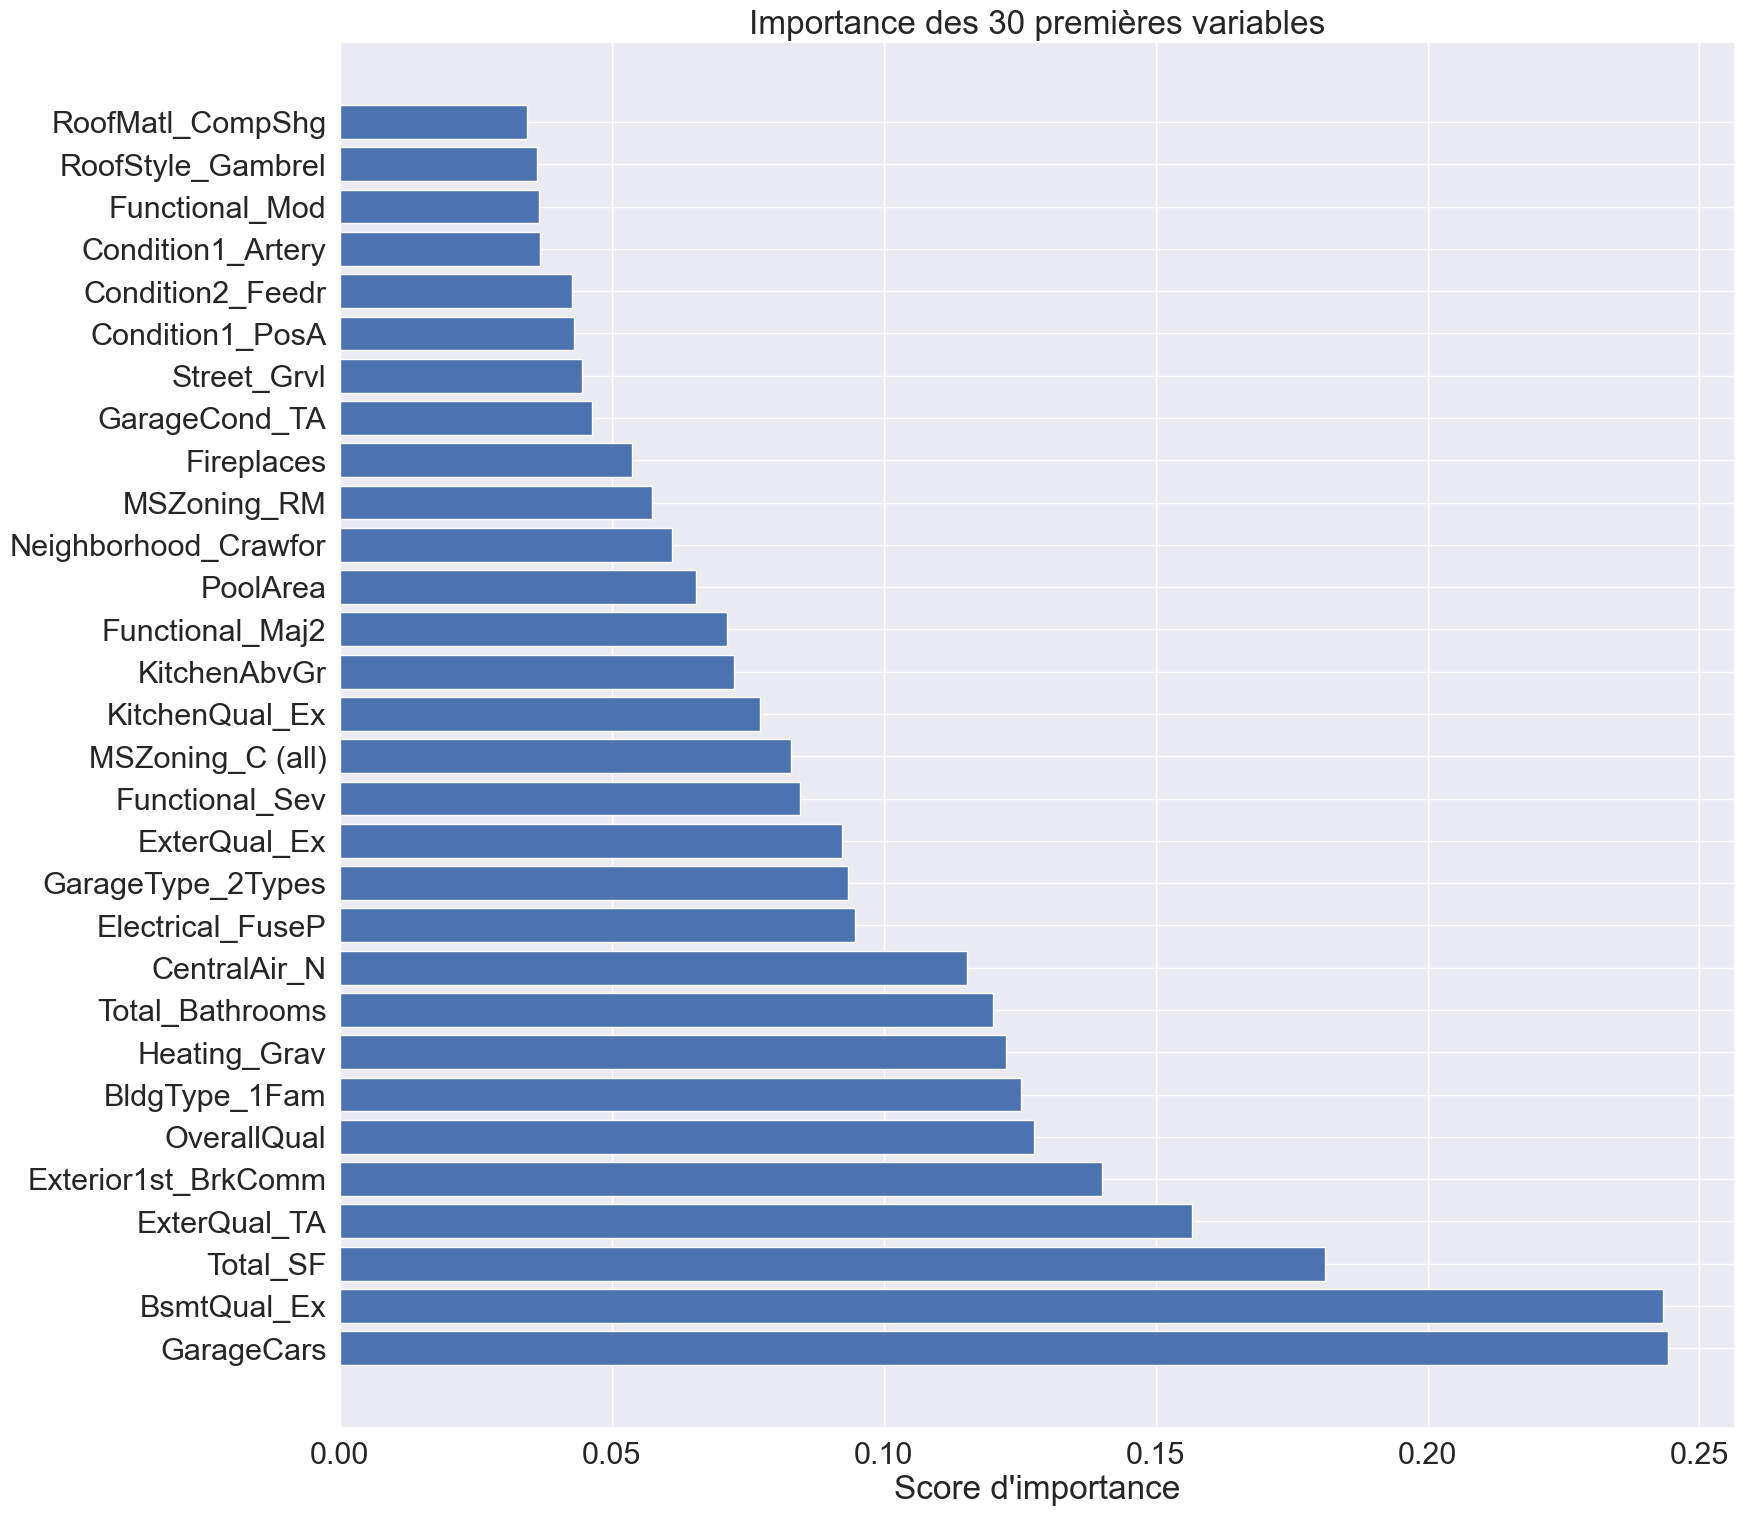

In [62]:
# Obtenir le dictionnaire des scores d'importance
importance_dict = Xgboost.get_booster().get_score(importance_type='gain')

# Trier le dictionnaire par ordre décroissant de score d'importance et prendre les 30 premières variables
top_features = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)[:30]

# Récupérer les noms et scores d'importance des 30 premières variables
feature_names = [x[0] for x in top_features]
feature_scores = [x[1] for x in top_features]

# Créer le diagramme à barres horizontales
import matplotlib.pyplot as plt
plt.figure(figsize = (18,18))
plt.barh(feature_names, feature_scores)
plt.title("Importance des 30 premières variables")
plt.xlabel("Score d'importance")
plt.show()

Nous pouvons ovserver sur les graphiques ci-dessus les variables qui ont le plus d'importance dans la prédiction de la variable cible (ou la plus grande contribution à la réduction de l'erreur de prédiction). c'est à dire que ces variables ont la plus grande capacité à expliquer la variation de la variable cible dans le modèle.

On va donc sélectionner les variables qui d'après ce graphique ont la plus forte importance, nous ne perderons pas à l'esprit que nous avons dummiser nos variables précedemment ce qui explique la présence de certaines variables plusieurs fois.

On Choisira les variables suivantes à l'aide ce de graphique :
- GarageCars
- BsmtQual
- Total_SF
- ExterQual
- OverallQuall
- MSZoning
- Neighborhood
- BldgType
- heating
- Total_Bahtooms
- CentralAir
- Electrical
- Condition1 et Condition2
- GarageType
- PoolArea
- KitchenQual
- YearRemodAdd 

In [63]:
# Sélectionner les colonnes souhaitées
selected_columns = ['GarageCars', 'BsmtQual', 'Total_SF', 'ExterQual', 'OverallQual', 
                    'MSZoning', 'Neighborhood', 'BldgType', 'Heating', 'Total_Bathrooms', 'CentralAir', 
                    'Electrical', 'Condition1', 'Condition2', 'GarageType', 'PoolArea', 'KitchenQual', 
                    'YearRemodAdd']
df_appli = df_train_test.loc[:, selected_columns]

In [64]:
# dummification des variables catégorielle selectionnées
df_appli_dummies = pd.get_dummies(df_appli)
X_train_appli = df_appli_dummies[:df_train.shape[0]]
X_train_appli


,GarageCars,Total_SF,OverallQual,Total_Bathrooms,PoolArea,YearRemodAdd,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA
0,2.0,2566.0,7,3.5,0,2003,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,2.0,2524.0,6,2.5,0,1976,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,2.0,2706.0,7,3.5,0,2002,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,3.0,2473.0,7,2.0,0,1970,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,3.0,3343.0,8,3.5,0,2000,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,2.0,2600.0,6,2.5,0,2000,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1456,2.0,3615.0,6,3.0,0,1988,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1457,1.0,3492.0,7,2.0,0,2006,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1458,1.0,2156.0,5,2.0,0,1996,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


#### Entrainement du Xgboostregressor réalisé précedemment

In [74]:
# Définir la grille de paramètres
grid = {}

# Créer un dictionnaire de scorers pour la validation croisée
scorers = {
    'rmse': make_scorer(mean_squared_error, squared=False),
    'r2': make_scorer(r2_score)
}
# Créer l'objet GridSearchCV avec la grille de paramètres et les scorers
grid_search = GridSearchCV(Xgboost, grid, scoring=scorers, refit='rmse', cv=5)

# Effectuer la validation croisée sur les données
grid_search.fit(X_train_appli, y_train)

# Afficher les meilleurs paramètres et les scores correspondants
print("Best parameters: ", grid_search.best_params_)
print("Best RMSE score: ", grid_search.best_score_)
print("Best R2 score: ", grid_search.cv_results_['mean_test_r2'][grid_search.best_index_])

Best parameters:  {}
Best RMSE score:  0.13862626539589382
Best R2 score:  0.8790743594829559


On observe une légère baisse de performance comparé au modèle contenant toutes les variables 

Rmse = 0.1230 -> Rmse = 0.1386

In [75]:
# Entrainement du modèle contenant les bon paramètre
Xgboost.fit(X_train_appli, y_train)

# Enregistrement du modèle 
with open("./Application/modele_xgb_pickle.pkl", "wb") as fichier:
    pickle.dump(Xgboost, fichier)